# Data Science Project using Stackoverflow's 2019, 2020 and 2021 Survey Results
## CRISP-DM process:
1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Modeling
5. Evaluation

### Business Understanding

I used last three years of Stackoverflow Developer Survey results to answer these three questions below:

1. Is there Language, Database, Platform and WebFrame preference differences between Turkey and EU Countries ?
2. What are top paid languages, databases, platforms and webframes ?
3. Salary trend analysis by country, age, years of code, education level and developer type through years

### Data Understanding
We'll use survey results which includes developer preferences and developers' personal info. We'll look at datasets, handle categorical values and missing data.

In [1]:
# required python libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", 'This pattern has match groups')

In [2]:
# read each survey results
df2021 = pd.read_csv(r".\data\2021\survey_results_public.csv")
df2020 = pd.read_csv(r".\data\2020\survey_results_public.csv")
df2019 = pd.read_csv(r".\data\2019\survey_results_public.csv")

# add year column for further analysis
df2021['SurveyYear'] = 2021
df2020['SurveyYear'] = 2020
df2019['SurveyYear'] = 2019

In [3]:
print("|------------Data info of df2019------------|")
df2019.info()
print("|------------Data info of df2020------------|")
df2020.info()
print("|------------Data info of df2021------------|")
df2021.info()

|------------Data info of df2019------------|
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88883 entries, 0 to 88882
Data columns (total 86 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Respondent              88883 non-null  int64  
 1   MainBranch              88331 non-null  object 
 2   Hobbyist                88883 non-null  object 
 3   OpenSourcer             88883 non-null  object 
 4   OpenSource              86842 non-null  object 
 5   Employment              87181 non-null  object 
 6   Country                 88751 non-null  object 
 7   Student                 87014 non-null  object 
 8   EdLevel                 86390 non-null  object 
 9   UndergradMajor          75614 non-null  object 
 10  EduOther                84260 non-null  object 
 11  OrgSize                 71791 non-null  object 
 12  DevType                 81335 non-null  object 
 13  YearsCode               87938 non-null  objec

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83439 entries, 0 to 83438
Data columns (total 49 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ResponseId                    83439 non-null  int64  
 1   MainBranch                    83439 non-null  object 
 2   Employment                    83323 non-null  object 
 3   Country                       83439 non-null  object 
 4   US_State                      14920 non-null  object 
 5   UK_Country                    4418 non-null   object 
 6   EdLevel                       83126 non-null  object 
 7   Age1stCode                    83243 non-null  object 
 8   LearnCode                     82963 non-null  object 
 9   YearsCode                     81641 non-null  object 
 10  YearsCodePro                  61216 non-null  object 
 11  DevType                       66484 non-null  object 
 12  OrgSize                       60726 non-null  object 
 13  C

We'll only use personel info, preferences and salary info. We'll use ConvertedComp for salary analysis

In [4]:
print("Shape of df2019: {}".format(df2019.shape))
print("Shape of df2019: {}".format(df2020.shape))
print("Shape of df2019: {}".format(df2021.shape))

Shape of df2019: (88883, 86)
Shape of df2019: (64461, 62)
Shape of df2019: (83439, 49)


### Data Preparation

Data preparation is needed before data exploration and analysis.



Some data preparation steps need to be done before using the dataset for exploration, including：

1. Check column values and bin values if needed
2. Check column names and eliminate differences
3. Handle missing values

In [6]:
# Check age column values
print("df2019 Age values:",df2019.Age.unique())
print("df2020 Age values:",df2020.Age.unique())
print("df2021 Age values:",df2021.Age.unique())

df2019 Age values: [14.  19.  28.  22.  30.  42.  24.  23.   nan 21.  31.  20.  26.  29.
 38.  47.  34.  32.  25.  17.  35.  27.  44.  43.  62.  37.  45.  18.
 33.  36.  16.  39.  64.  41.  54.  49.  40.  56.  12.  58.  46.  59.
 51.  48.  57.  52.  50.  23.9 55.  15.  67.  13.   1.  53.  69.  65.
 17.5 63.  61.  68.  73.  70.  60.  16.5 46.5 11.  71.   3.  97.  29.5
 77.  74.  26.5 26.3 24.5 78.  72.  66.  76.  10.  75.  99.  83.  79.
 36.8 14.1 13.5 19.5 98.  43.5 22.5 31.5 21.5 28.5 33.6  2.  38.5 30.8
 24.8 90.  61.3 81.   4.  17.3 19.9 80.  85.  88.  23.5 16.9 20.9 91.
 98.9 57.9  9.  94.  95.  37.5 14.5  5.  82.  84.  37.3 33.5 53.8 31.4
 87. ]
df2020 Age values: [  nan  25.   31.   36.   30.   22.   23.   49.   53.   27.   45.   32.
  24.   40.   18.   39.   29.   16.   34.   19.   35.   20.   38.   57.
  28.   17.   44.   21.   48.   26.   42.   55.   37.   50.   41.   64.
  63.   33.   43.   51.   60.   59.   62.   69.   52.   46.   49.5  56.
  47.   15.   72.   13.   71.   54

After 2021, Survey answers are range of ages. So I'd like to even the age groups for all years in order to analyse easily

In [25]:
print("df2019 missing salary percentage:",df2019.ConvertedComp.isnull().sum() / df2019.ConvertedComp.shape[0])
print("df2020 missing salary percentage:",df2020.ConvertedComp.isnull().sum() / df2020.ConvertedComp.shape[0])
print("df2021 missing salary percentage:",df2021.ConvertedCompYearly.isnull().sum() / df2021.ConvertedCompYearly.shape[0])

df2019 missing salary percentage: 0.3719496416637602
df2020 missing salary percentage: 0.4608212717767332
df2021 missing salary percentage: 0.4385838756456813


In [7]:
# Binning age ranges. 2021 comes with binned data
agebins = [0, 17, 24, 34, 44, 54, 64,100]
agelabels = ['Under 18 years old','18-24 years old','25-34 years old','35-44 years old','45-54 years old','55-64 years old','65 years or older']
df2020['Agebinned'] = pd.cut(df2020['Age'], bins=agebins, labels=agelabels)
df2019['Agebinned'] = pd.cut(df2020['Age'], bins=agebins, labels=agelabels)


In [27]:
# Binning years of coding ranges
yearbins = [['Less than 1 year','1','2'],['3','4','5'],['6','7','8','9','10'],['11','12','13','14','15'],['16','17','18','19','20'],['21','22','23','24','25','26','27','28','29','30','31','32','33','34','35','36','37','38','39','40','41','42','43','44','45','46','47','48','49','50','More than 50 years']]
yearlabels  = ['0-2 years','3-5 years','6-10 years','11-15 years','16-20 years','20+ years']

for i in range(len(yearlabels)):
    df2021.loc[df2021.YearsCode.isin(yearbins[i]),'YearsCodebinned'] = yearlabels[i]
    df2020.loc[df2020.YearsCode.isin(yearbins[i]),'YearsCodebinned'] = yearlabels[i]
    df2019.loc[df2019.YearsCode.isin(yearbins[i]),'YearsCodebinned'] = yearlabels[i]

In [28]:
# Get required columns and renaming for same naming convention. Remove rows if had no salary info.
df2021 = df2021[['EdLevel','YearsCodebinned','OrgSize','CompTotal','ConvertedCompYearly','CompFreq','Age','Gender','DevType','Country','Employment','MainBranch','LanguageHaveWorkedWith','DatabaseHaveWorkedWith','PlatformHaveWorkedWith','WebframeHaveWorkedWith','SurveyYear']].rename(columns={'Agebinned': 'Age','YearsCodebinned':'YearsCode','LanguageHaveWorkedWith': 'LanguageWorkedWith','DatabaseHaveWorkedWith': 'DatabaseWorkedWith','PlatformHaveWorkedWith': 'PlatformWorkedWith','WebframeHaveWorkedWith': 'WebframeWorkedWith', 'ConvertedCompYearly':'ConvertedComp'})
df2020 = df2020[['EdLevel','Agebinned','CompFreq','CompTotal','ConvertedComp','Country','Employment','Gender','DevType','YearsCodebinned','OrgSize','MainBranch','LanguageWorkedWith','DatabaseWorkedWith','PlatformWorkedWith','WebframeWorkedWith','SurveyYear']].rename(columns={'Agebinned': 'Age','YearsCodebinned':'YearsCode'})
df2019 = df2019[['EdLevel','Agebinned','CompFreq','CompTotal','ConvertedComp','Country','Employment','Gender','DevType','YearsCodebinned','OrgSize','MainBranch','LanguageWorkedWith','DatabaseWorkedWith','PlatformWorkedWith','WebFrameWorkedWith','SurveyYear']].rename(columns={'WebFrameWorkedWith': 'WebframeWorkedWith','YearsCodebinned':'YearsCode'})

# Combine survey results
df = pd.concat([df2021,df2020,df2019])


In [29]:
df.shape

(236783, 18)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236783 entries, 0 to 88882
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   EdLevel             226947 non-null  object 
 1   YearsCode           227263 non-null  object 
 2   OrgSize             176851 non-null  object 
 3   CompTotal           137954 non-null  float64
 4   ConvertedComp       137423 non-null  float64
 5   CompFreq            155487 non-null  object 
 6   Age                 127852 non-null  object 
 7   Gender              218249 non-null  object 
 8   DevType             197189 non-null  object 
 9   Country             236262 non-null  object 
 10  Employment          234358 non-null  object 
 11  MainBranch          235932 non-null  object 
 12  LanguageWorkedWith  227304 non-null  object 
 13  DatabaseWorkedWith  195109 non-null  object 
 14  PlatformWorkedWith  186692 non-null  object 
 15  WebframeWorkedWith  169008 non-null

In [31]:
df.sample(5)

,EdLevel,YearsCode,OrgSize,CompTotal,ConvertedComp,CompFreq,Age,Gender,DevType,Country,Employment,MainBranch,LanguageWorkedWith,DatabaseWorkedWith,PlatformWorkedWith,WebframeWorkedWith,SurveyYear,Agebinned
75878,Some college/university study without earning ...,6-10 years,100 to 499 employees,410000.0,11036.0,Yearly,NaN,Man,"Database administrator;Developer, back-end;Dev...",Argentina,Employed full-time,I am a developer by profession,C#;Dart;Go;Java;SQL,MongoDB;Microsoft SQL Server,Android;Heroku;Slack;Windows;WordPress,ASP.NET,2019,NaN
64140,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6-10 years,10 to 19 employees,NaN,NaN,Monthly,NaN,NaN,"Developer, back-end;Developer, front-end;Devel...",Germany,Employed full-time,I am a developer by profession,Bash/Shell/PowerShell;C#;Go;Java;JavaScript;Py...,Microsoft SQL Server;PostgreSQL;Redis;SQLite,Docker;Kubernetes;Linux;MacOS;Microsoft Azure;...,ASP.NET;ASP.NET Core;Django;Express;Gatsby;jQu...,2020,NaN
57592,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",3-5 years,100 to 499 employees,30000.0,5040.0,Monthly,NaN,Man,"Developer, back-end;Developer, mobile;Develope...",India,Employed full-time,I am a developer by profession,Java,Firebase;SQLite,Android,NaN,2019,NaN
346,Some college/university study without earning ...,3-5 years,2 to 9 employees,21000.0,27144.0,Yearly,25-34 years old,Man,"Developer, back-end;Developer, front-end",United Kingdom,Employed full-time,I am a developer by profession,HTML/CSS;JavaScript,DynamoDB,Windows,jQuery,2020,NaN
48086,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",20+ years,"5,000 to 9,999 employees",200000.0,200000.0,Yearly,45-54 years old,Man,Data or business analyst,United States of America,Employed full-time,"I am not primarily a developer, but I write co...",Bash/Shell;Clojure;PHP;Python,MySQL;PostgreSQL,AWS,React.js,2021,NaN


In [32]:
# fixing naming differences for EdLevel column

associate = ['Associate degree (A.A., A.S., etc.)','Associate degree']
bachelor = ['Bachelor’s degree (B.A., B.S., B.Eng., etc.)','Bachelor’s degree (BA, BS, B.Eng., etc.)']
master = ['Master’s degree (MA, MS, M.Eng., MBA, etc.)','Master’s degree (M.A., M.S., M.Eng., MBA, etc.)']
doctoral = ['Other doctoral degree (Ph.D, Ed.D., etc.)','Other doctoral degree (Ph.D., Ed.D., etc.)']
something = ['I never completed any formal education','Something else']

df.loc[df.EdLevel.isin(associate),'EdLevel'] = 'Associate degree'
df.loc[df.EdLevel.isin(bachelor),'EdLevel'] = 'Bachelor’s degree'
df.loc[df.EdLevel.isin(master),'EdLevel'] = 'Master’s degree'
df.loc[df.EdLevel.isin(doctoral),'EdLevel'] = 'Other doctoral degree'
df.loc[df.EdLevel.isin(something),'EdLevel'] = 'Something else'

In [33]:
# All selected EU Countries & Turkey for analysis
all_countries = ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden','Turkey']
# All selected EU Countries for analysis
eu_countries = ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden']


### Modeling

## Question-1
Is there Language, Database, Platform and WebFrame preference differences between Turkey and EU Countries ?

This functions below collects all multi-select answers from selected columns and counts it for two groups. Then visualize it as bar plot

In [34]:
def plot_comparison_pref(df,column,group1,group2,year,no):
    '''
    INPUT:
    df - Dataframe containes selected years of survey results
    column - selected column for comparison (X axis)
    group1 - list of selected countries for plot
    group2 - list of selected countries for plot
    year - year of the results
    no - max plotted results of the column
    OUTPUT:
    bar plot
    
    Provides a bar plot for specific category comparing two group of countries
    Ordered descending by percentage of counts
    '''
    fig, ax = plt.subplots()
    width = 0.4

    result1 = df.loc[(df.Country.isin(group1)) & (df.SurveyYear == year),column].str.split(';',expand=True).stack().value_counts()
    result2 = df.loc[(df.Country.isin(group2)) & (df.SurveyYear == year),column].str.split(';',expand=True).stack().value_counts()
    (result1[:no] / result1[:no].sum()).plot(kind='bar', color='red', ax=ax, width=width, position=0, label='Group1')
    (result2[:no] / result2[:no].sum()).plot(kind='bar', color='blue', ax=ax, width=width, position=1, label='Group2', sharey=True)

    ax.legend(loc='upper right')
    plt.show()

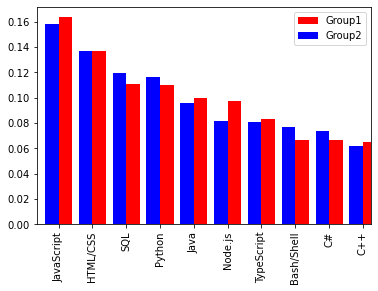

In [35]:
plot_comparison_pref(df,'LanguageWorkedWith',group1=['Turkey'],group2=eu_countries,year=2021,no=10)

Looks like Turkish developers tend to prefer javascript more than EU developers

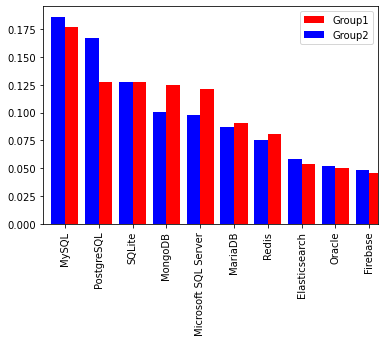

In [36]:
plot_comparison_pref(df,'DatabaseWorkedWith',group1=['Turkey'],group2=eu_countries,year=2021,no=10)

Turkish developers tend to work less with PostgreSQL and MySQL than other databases

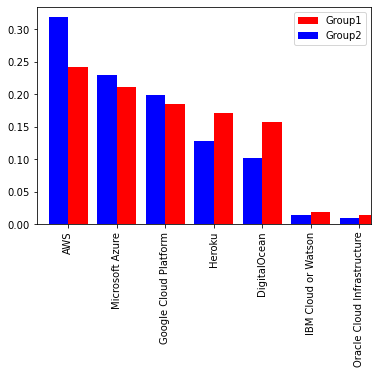

In [37]:
plot_comparison_pref(df,'PlatformWorkedWith',group1=['Turkey'],group2=eu_countries,year=2021,no=10)

EU and Turkish developers preferes mostly AWS and MS Azure but Platform choice is moreor less distributed in Turkey

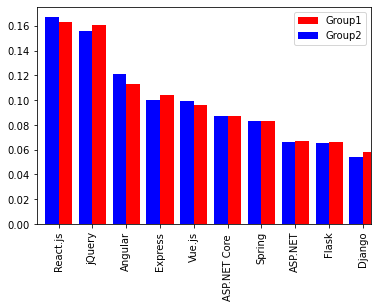

In [38]:
plot_comparison_pref(df,'WebframeWorkedWith',group1=['Turkey'],group2=eu_countries,year=2021,no=10)

Webframe choice is also looks like same in two groups

General preferences of Language, Database, Platform and Webframe between Turkey and EU Countries more or less looks similar with little differences.

## Question-2

What are top paid languages, databases, platforms and webframes ?

Function below gives us table or plot of the selected column with multi-choice of aggregated salary

In [49]:
def plot_byyear(df,column,top=10,percentile=0.9):
    '''
    INPUT:
    df - Dataframe contains survey results
    column - selected column for plotting (X axis)
    top - top n number of category will be selected
    OUTPUT:
    Box plot or table
    
    Provides a box plot for specific category.
    '''
    # Get top n values of selected category
    toplist = df.loc[:,column].str.split(';',expand=True).stack().value_counts().reset_index().rename(columns={'index':column,0:'Count'})[:top]
    # Explode multi-select answers
    df_1 = df.assign(**{column:df[column].astype(str).str.split(';')}).explode(column)
    # Get only top values and below 0.9 quantile in order to eliminate exterme values
    df_2 = df_1.loc[(df_1[column].isin(toplist[column])) & (df_1.ConvertedComp<df_1.groupby([column,'SurveyYear']).ConvertedComp.transform('quantile',percentile))]
    plt.figure(figsize = (15,8))
    ax = sns.boxplot(data=df_2,x=column,y='ConvertedComp',hue='SurveyYear',order=df_2.groupby(column).ConvertedComp.median().sort_values(ascending=False).index)
    plt.xticks(rotation=90)
    plt.show()

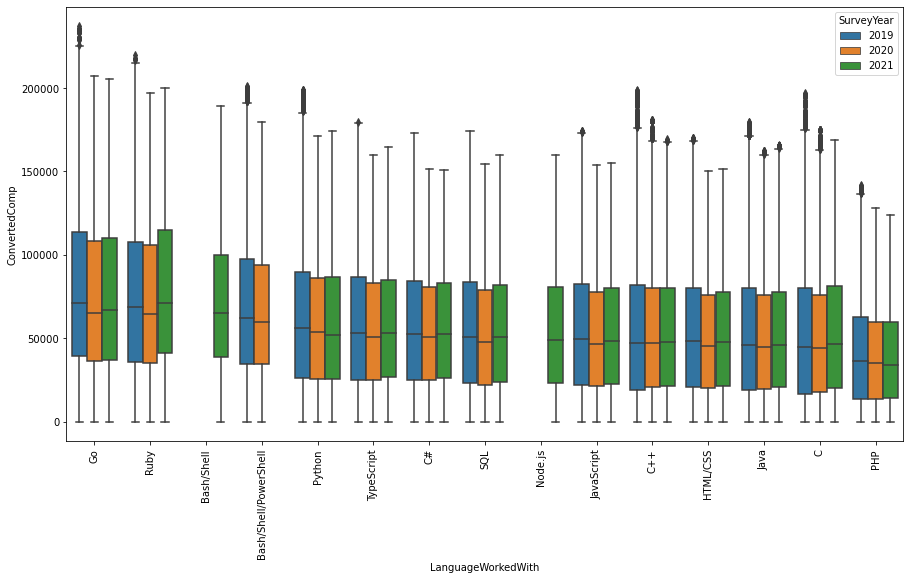

In [131]:
plot_byyear(df.loc[~df.ConvertedComp.isnull()],'LanguageWorkedWith',top=15)

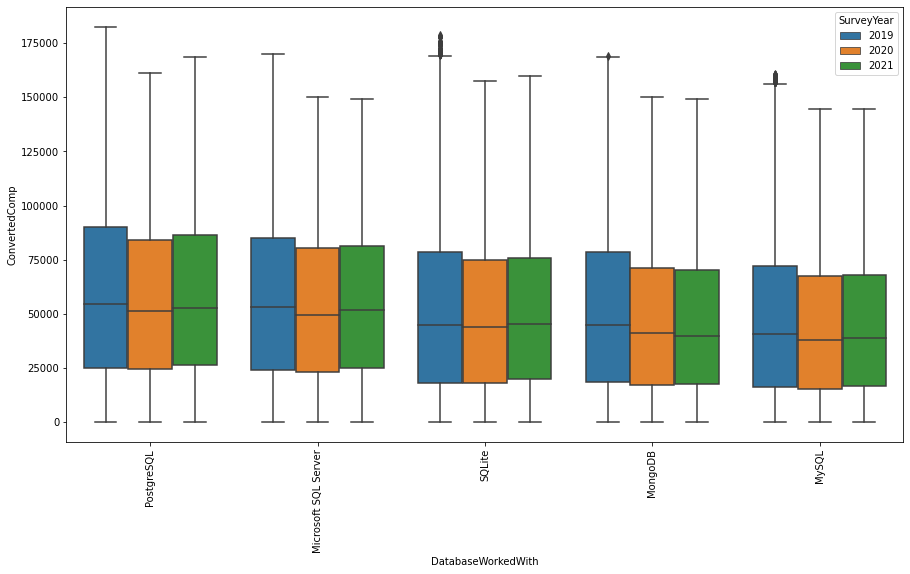

In [135]:
plot_byyear(df.loc[~df.ConvertedComp.isnull()],'DatabaseWorkedWith',top=5)

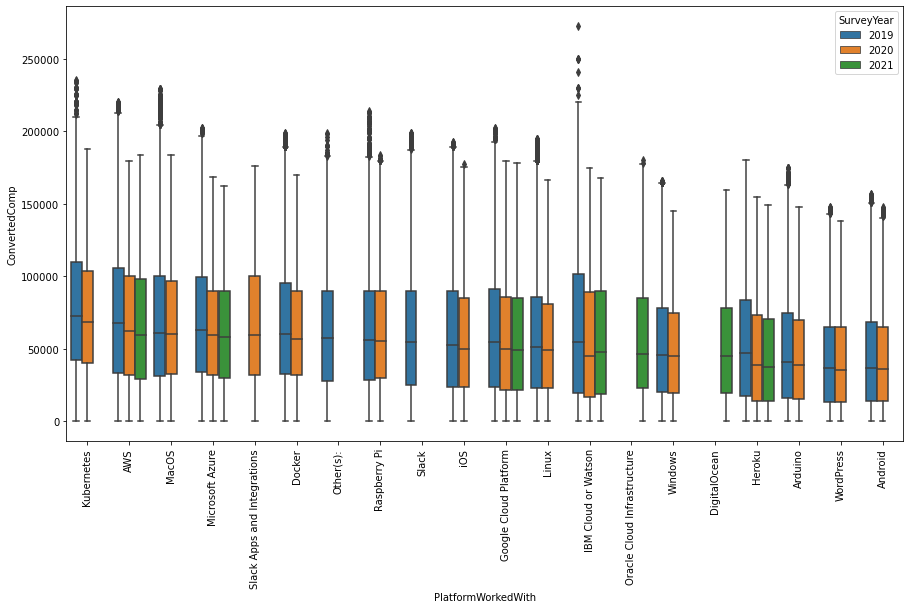

In [137]:
plot_byyear(df.loc[~df.ConvertedComp.isnull()],'PlatformWorkedWith',top=100)

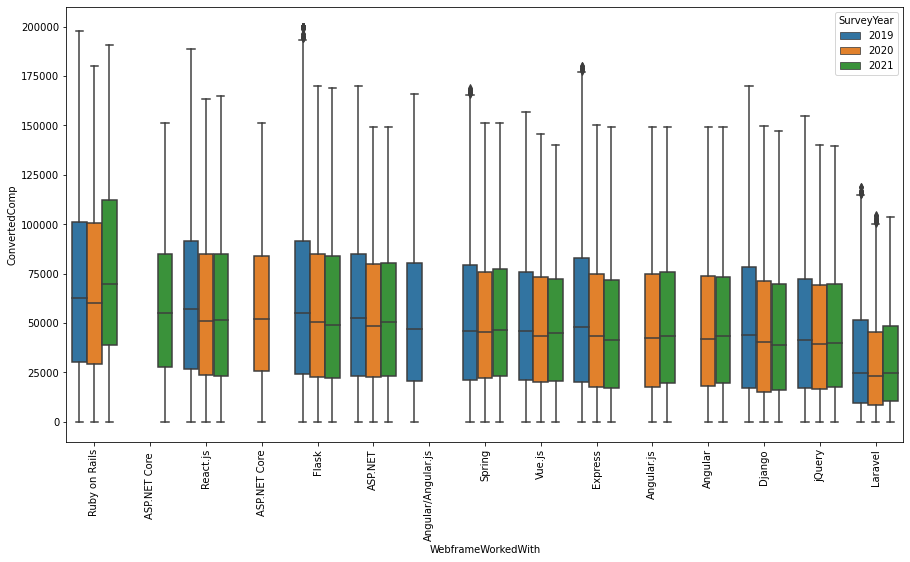

In [141]:
plot_byyear(df.loc[~df.ConvertedComp.isnull()],'WebframeWorkedWith',top=15)

# Question-3

Salary trend analysis by country, age, years of code, education level and developer type through years

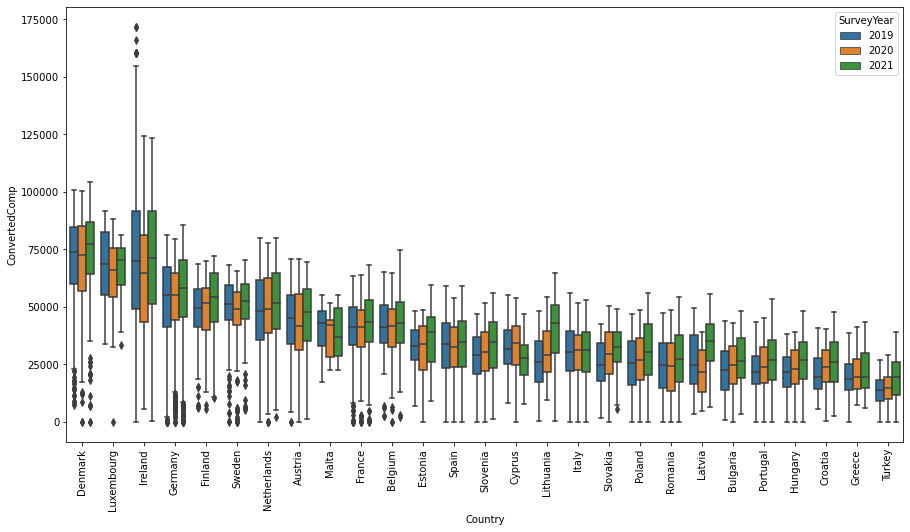

In [55]:
plot_byyear(df.loc[df.Country.isin(all_countries)],'Country',top=100,percentile=0.75)

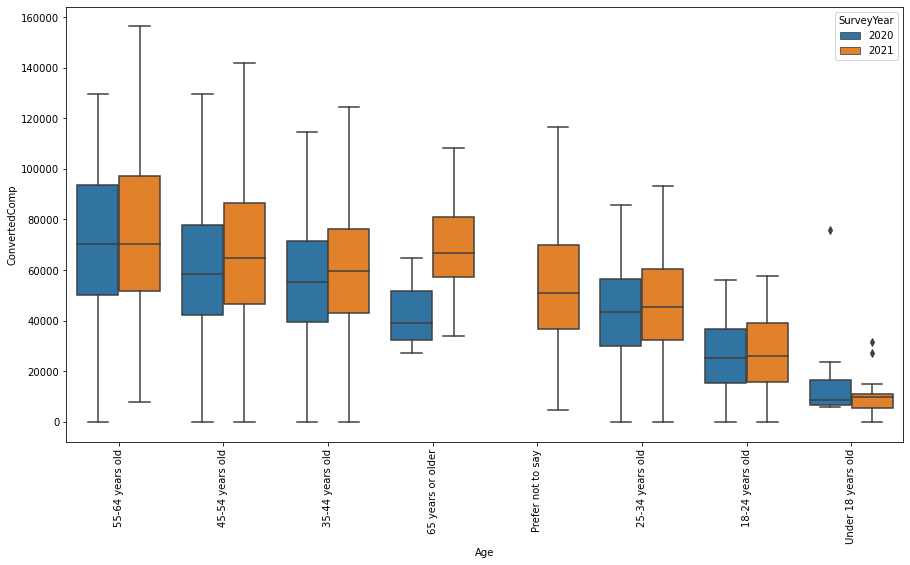

In [56]:
plot_byyear(df.loc[df.Country.isin(all_countries)],'Age',top=100,percentile=0.9)

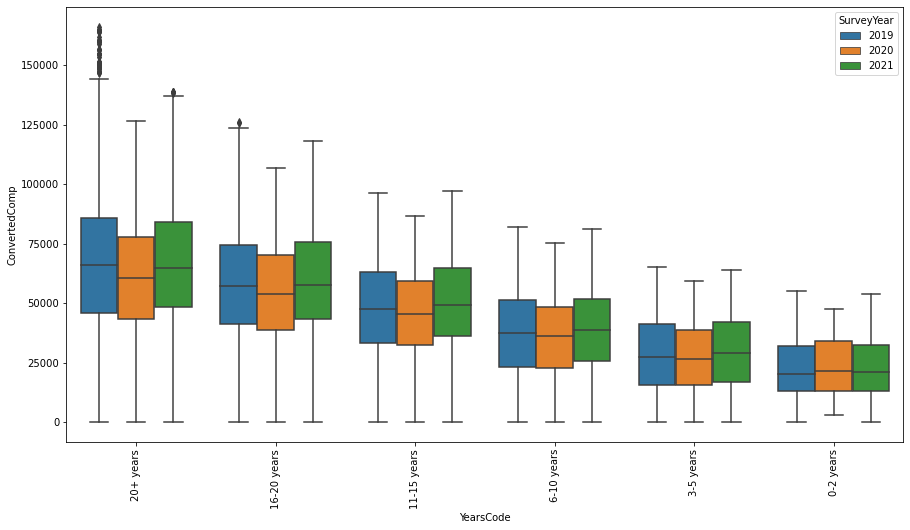

In [57]:
plot_byyear(df.loc[df.Country.isin(all_countries)],'YearsCode',top=100,percentile=0.9)

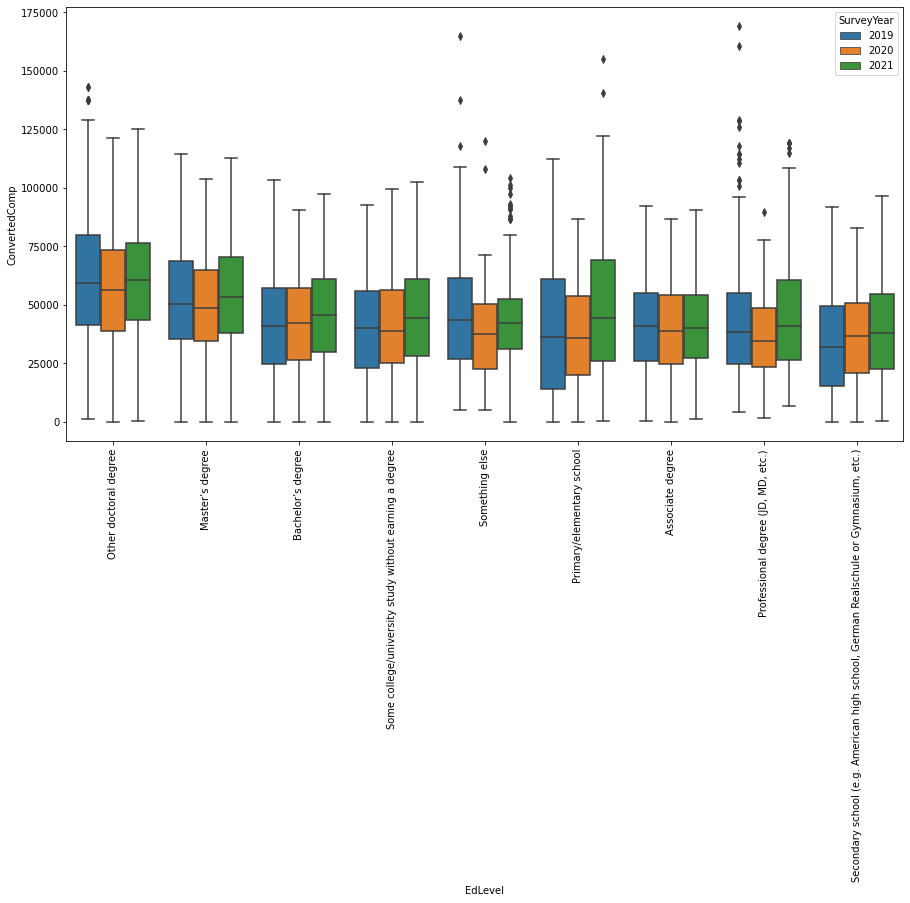

In [58]:
plot_byyear(df.loc[df.Country.isin(all_countries)],'EdLevel',top=100,percentile=0.9)

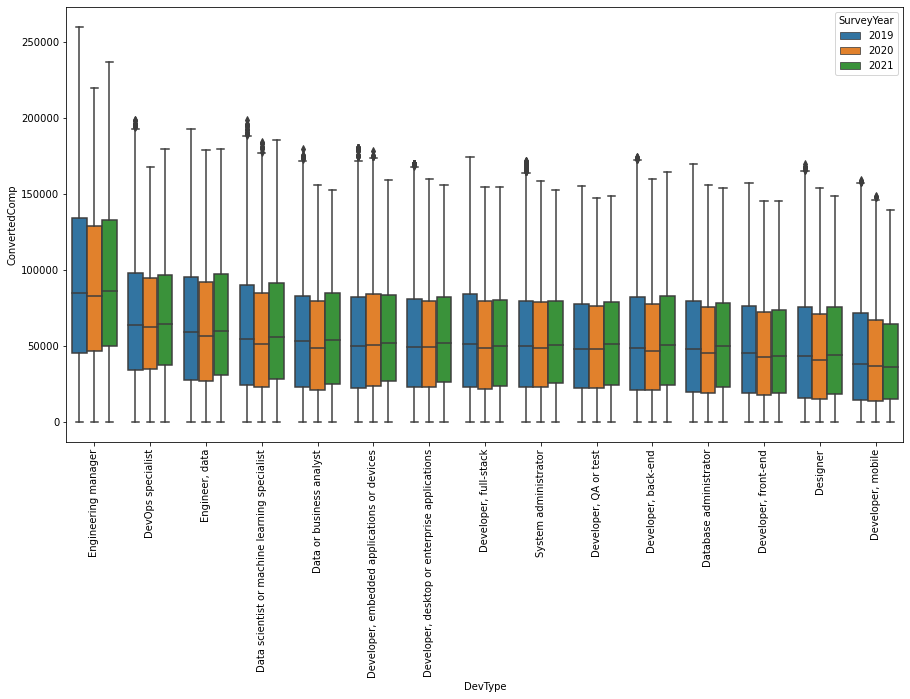

In [59]:
plot_byyear(df.loc[~df.ConvertedComp.isnull()],'DevType',top=15)

### Evaluation

1. Language, Database, Platform and Webframe differences are not significant between EU and Turkish Developers
2. Most paid:
    1. Go and Ruby are most paid programming languages even they are not in the top 10 prefered languages
    2. Among top 5 prefered databases, PostgreSQL is the most paid database. DynamoDB is the most paid among all databases
    3. Kubernetes and AWS are the most paid platform
    4. Ruby on Rails, ASP.NET and React.js are the most paid webframes
3. Salary trends:
    1. Age, Years of Code and Education Level have positivel correlation with Salary
    2. Engineering Manager is by far most paid developer type among choices. Devops and other data related job roles are consecutively most paid
    3. Northern Europe countries are paid more than other EU countries. Unfortunaly least paid country is Turkey :(
    
   


In [128]:
X = pd.get_dummies(df.loc[(df.Country.isin(all_countries)) & (~df.ConvertedComp.isnull()), df.columns.isin(['YearsCode','EdLevel', 'OrgSize', 'Age'])])
y = df.loc[(~df.ConvertedComp.isnull()) & (df.Country.isin(all_countries)), 'ConvertedComp']

In [130]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(X,y)

KeyboardInterrupt: 